## Exploratory Data Analysis - Ames House Price Dataset


## This Work is focused on the Ames Housing Dataset---- The Ames is a small town in Lowa which is located in the United State of America (USA). This dataset contains the information of the houses sold in Ames from the year 2006-2010.

## **Module Import**
# I imported the modules using the codes below


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='rainbow')
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset from where it was saved into wuth read_csv function
AmesHousing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SD/AmesHousing.txt', delimiter = '\t')
AmesHousing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Get the shape of the data

In [ ]:
# Check the shape of the dataset
AmesHousing.shape

(2930, 82)

There are 2930 rows and 82 columns contained in the dataset.

In [ ]:
## Checking the data types in the dataset
AmesHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## **Data PreProcessing**
To clean the dataset, Remove or fill missing values, Check for outliers and remove all unnecessary columns.


Check for Missing Values

In [ ]:
## check features with missing values in acending order
AmesHousing.isna().sum().sort_values(ascending=False).iloc[0:28]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
Paved Drive          0
dtype: int64

Handling Numerical Variables

In [ ]:
## For the missing numerical values put 0
for columns in AmesHousing.select_dtypes(exclude=['object']):
  AmesHousing[columns] = AmesHousing[columns].fillna(0)

Categorical Variables
In the description of the dataset,most of the categorical values are not actually misisng but represented by different variables that the data is reading as Nan Values. To fill these missing values, put NAN as NONE, NB,NF,NAC,NG,NFP,NBM as NAN

In [ ]:
## Fill Categorical Variables by putting  string value
AmesHousing.fillna({'Alley': 'NAC', 'Mas Vnr Type': 'NONE', 'Bsmt Qual': 'NBM', 'Bsmt Cond': 'NBM',
                    'Bsmt Exposure': 'NBM', 'BsmtFin Type 1': 'NBM', 'BsmtFin Type 2': 'NBM', 'Electrical': 'MX',
                    'Fireplace Qu': 'NFP', 'Garage Type': 'NG', 'Garage Finish': 'NG', 'Garage Qual': 'NG', 'Garage Cond': 'NG',
                    'Pool QC': 'NP', 'Fence': 'NF', 'Misc Feature': 'NONE'}, inplace=True)

#Remove Unnecessary Column


Removed the columns that will not influence the sale price using the drop command

In [ ]:
AmesHousing = AmesHousing.drop(columns=['Order', 'Neighborhood', 'PID', 'Condition 1', 'Condition 2'])

print(AmesHousing)


      MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0              20        RL         141.0     31770   Pave   NAC       IR1   
1              20        RH          80.0     11622   Pave   NAC       Reg   
2              20        RL          81.0     14267   Pave   NAC       IR1   
3              20        RL          93.0     11160   Pave   NAC       Reg   
4              60        RL          74.0     13830   Pave   NAC       IR1   
...           ...       ...           ...       ...    ...   ...       ...   
2925           80        RL          37.0      7937   Pave   NAC       IR1   
2926           20        RL           0.0      8885   Pave   NAC       IR1   
2927           85        RL          62.0     10441   Pave   NAC       Reg   
2928           20        RL          77.0     10010   Pave   NAC       Reg   
2929           60        RL          74.0      9627   Pave   NAC       Reg   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  

In [ ]:
# describe the response variable (Sale Price)
AmesHousing['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Visualizing the sale price variable using histogram

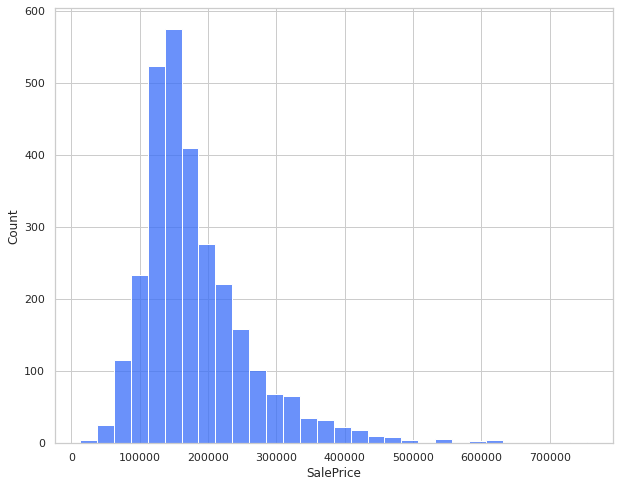

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(AmesHousing['SalePrice'], bins=30, )
# plt.show()

In [ ]:
AmesHousing['SalePrice'].skew()

1.7435000757376466

In [ ]:
AmesHousing['SalePrice'].kurt()

5.118899951130896

The distribution of the sale price(target variable) has a skewness of 1.74 and Kurtosis of 5.11. With these, we can say that the sale price is positively skewed which means it is skewed to the right be because it has a skewness of 1.74 while the skewness of normal distribution is 0. The measure of the kurtosis is 5.11 which means it is heavy_tailed while the kurtosis of normal distribution is 0.

## Exploratory Data Analysis
To gain an in depth understanding of the datset,Visualizing questions and interpreting the solutions

### What is the relationship between the total number of rooms and the sale price of a property?

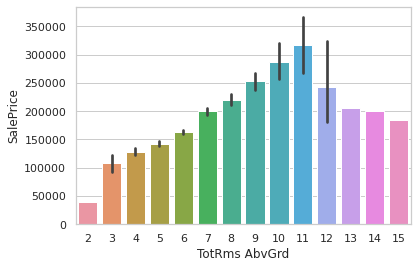

In [ ]:
# Using barplot to detrmine the relationship between TotRms AbvGrd and SalePrice
sns.barplot(data=AmesHousing, x="TotRms AbvGrd", y='SalePrice')

The TotRms AbvGrd (Total Rooms Above Ground) and the Sale Price have positive correlation because as the TotRms AbvGrd is increasing the sale price is increasing. However, There was a change in pattern. The Sale Price started decreasing as well as the TotRms AbvGrd

## How does the Overall Quality affects the sale price of a property?

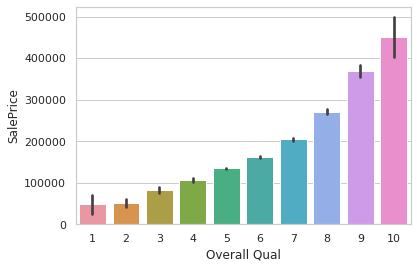

In [ ]:
# To determine the effect of Overall Qual o the sale Price of Property
sns.barplot(data=AmesHousing, x="Overall Qual", y='SalePrice')

The Overall Qual is the ratings of the overall material used and the finishing of the house, this can affect the sale price of the house.
The plot above illustrates the relationship between the Overall Qual and the Sale price. It is observed that there is a positive correlation between the Overall Qual and the Sale price because the greater the overall quality of materials used and finishing the higher the sale  price and the poorer the overall quality of the materials used and finishing the lower the sale price.

## What is the correlation between total Bsmt SF and the sales price


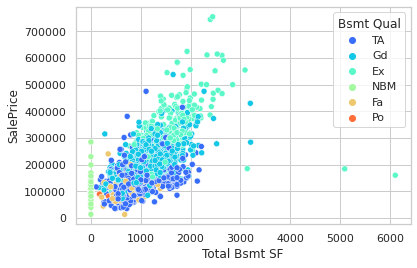

In [ ]:
sns.scatterplot(x = 'Total Bsmt SF', hue='Bsmt Qual', y = 'SalePrice', data=AmesHousing)

The above plot shows the correlation between Total Bsmt SF,Bsmt Qual and Sale Price.
It is observed that the Total Bsmt SF,Bsmt Qual and Sale Price Correlates positively, this means that Bsmt Qual increases as the Total Bsmt and Sale Price increases. So the sale price of the Total Bsmt depends on the Bsmt Quality.

## Does the size of 1st floor area in(Square feet) influenece the sale price of the property?

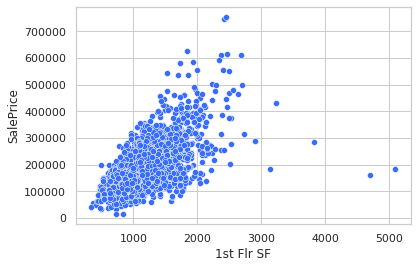

In [ ]:
sns.scatterplot(x = '1st Flr SF', y = 'SalePrice', data=AmesHousing)

The 1st Flr SF is the size of the first floor measured in square feet. The above plot demonstrates the correlation between the 1st Floor SF and the sales price. It clearly shows that the larger the size of the 1st Floor the bigger the sale price, this means people are willing to pay a huge amount for a huge size floor.

In [ ]:
corr_list = corr['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647562
Garage Area        0.640138
Total Bsmt SF      0.632529
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.433147
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Yr Blt      0.253459
Lot Frontage       0.201875
Bsmt Unf SF        0.183308
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
Overall Cond      -0.101697
Kitchen AbvGr     -0.119814
Enclosed Porch    -0.128787
Name: SalePrice, dty

The Overall Qual, Gr Liv Area, Garage Cars, Garage Area, Total Bsmt, and 1st floor have quite a high correlation coefficient

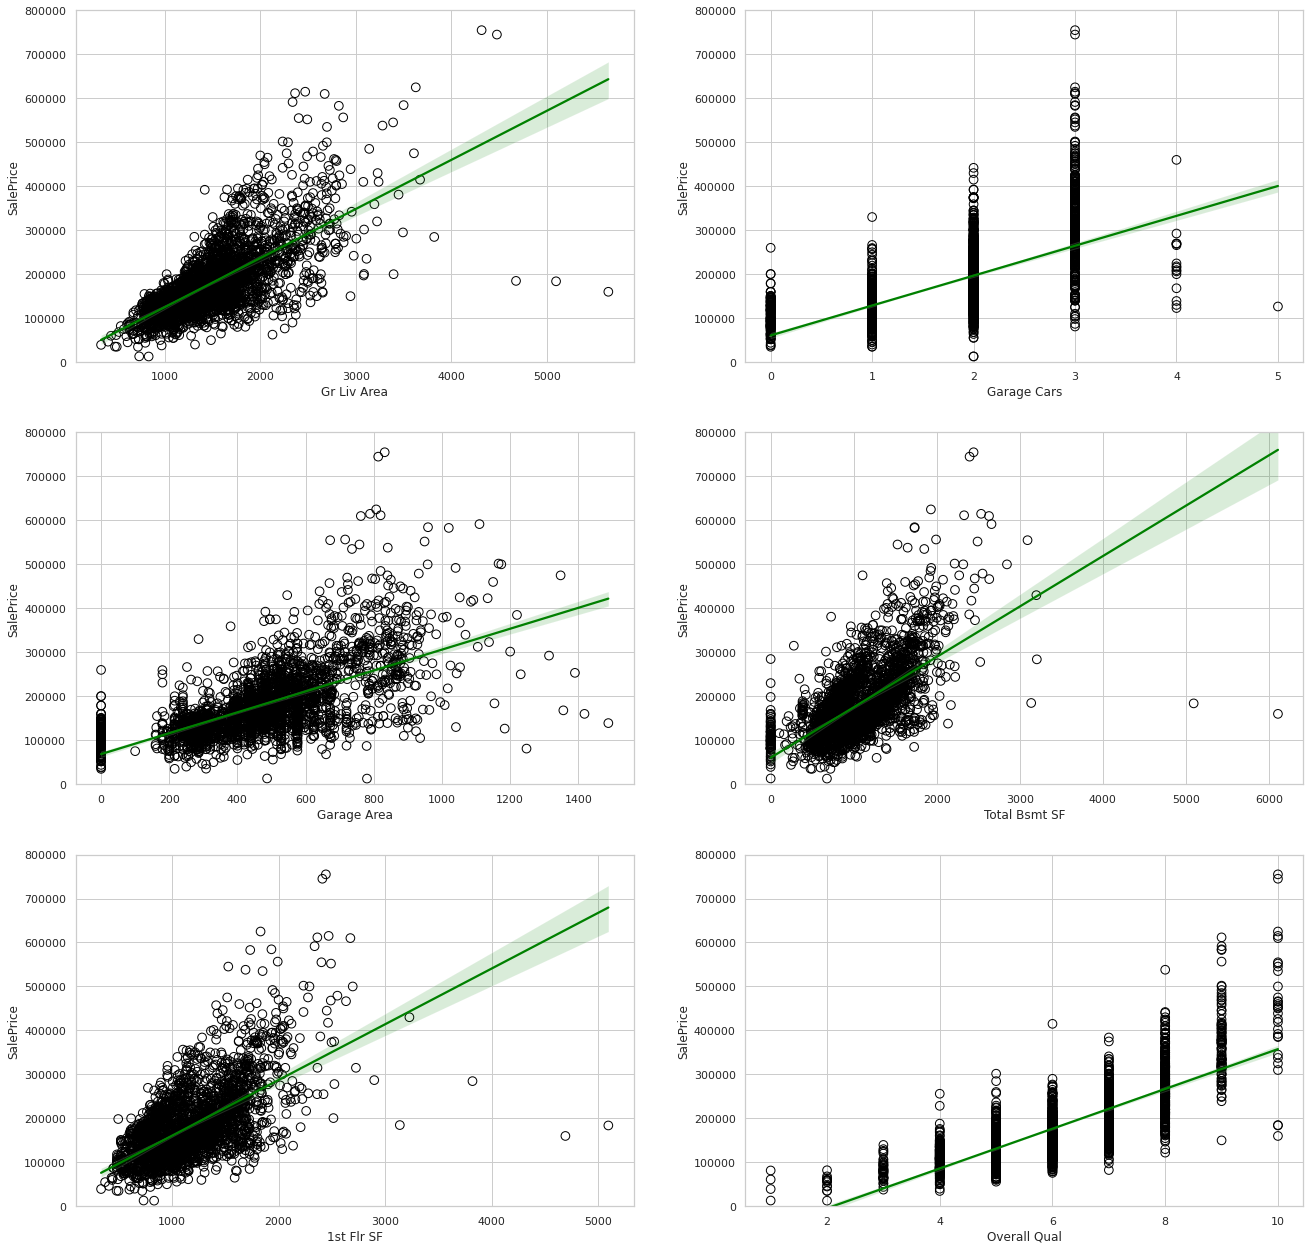

In [ ]:
# plotting the correlation coefficient of the sale price
plt.figure(figsize=(22, 22))
k = 6

for i in range(k):
    ii = '32'+str(i)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(AmesHousing[feature], AmesHousing['SalePrice'], facecolors='none', edgecolors='k', s=75)
    sns.regplot(x=feature, y='SalePrice', data=AmesHousing, scatter=False, color='g')
    ax=plt.gca()
    ax.set_ylim([0,800000])

The plot above shows the correlation coefficient of some Numeric features and the sale price
1. The Gr Liv Area and the sale price are highly correlated, so this means the size of the Gr Liv Area influences the sale price of the property. The bigger the size of the Gr Liv Area the bigger the sales price.
2. The

# References
1. Kaggle.com
2. https://www.simplilearn.com/tutorials/data-analytics-tutorial/exploratory-data-analysis
3. https://seaborn.pydata.org/
4.https://datascienceparichay.com/article/pandas-count-missing-values-in-each-column/#:~:text=To%20get%20the%20count%20of%20missing%20values%20in,the%20sum%20of%20missing%20values%20in%20each%20column.